In [1]:
from pytket import Circuit

In [2]:
import qiskit

In [3]:
qiskit.__qiskit_version__

C:\Users\krist\AppData\Local\Programs\Python\Python39\lib\site-packages\qiskit\aqua\__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


{'qiskit-terra': '0.18.1', 'qiskit-aer': '0.8.2', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.16.0', 'qiskit-aqua': '0.9.4', 'qiskit': '0.29.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [4]:
from qiskit import IBMQ

In [5]:
IBMQ.save_account('2a6c238dccc4a7d3474d9486abe0e429ab4e02fff5def5fd8c17190903e308b7653d923ea8809f75ad5d8308e30dd17da7f3a90572ff9e91562a7728b8467abb')

configrc.store_credentials:WARNING:2021-08-09 20:50:51,595: Credentials already present. Set overwrite=True to overwrite.


In [6]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [7]:
from qiskit import *

In [8]:
qr = QuantumRegister(2)

In [9]:
cr = ClassicalRegister(2)

In [10]:
circuit = QuantumCircuit(qr, cr)

In [11]:
%matplotlib inline
circuit.draw(initial_state=True, 
             cregbundle=False)

q0_0: |0>
         
q0_1: |0>
         
 c0_0: 0 
         
 c0_1: 0

In [12]:
circuit.h(qr[0]) #Build a gate. TO create entanglement use a hadamart gate

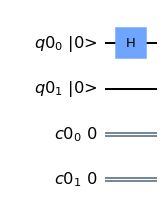

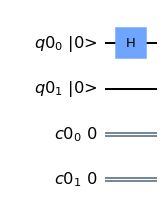

In [14]:
circuit.draw(initial_state=True, 
             cregbundle=False, output = 'mpl')

In [15]:
#Create a two qunit operation

circuit.cx(qr[0], qr[1]) #contolled x

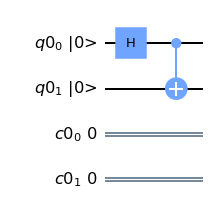

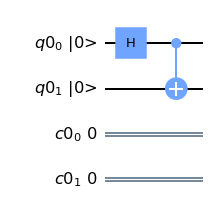

In [16]:
circuit.draw(initial_state=True, 
             cregbundle=False, output = 'mpl') #Thus we have generated enanglement

In [17]:
circuit.measure(qr, cr) #these are the measurements 

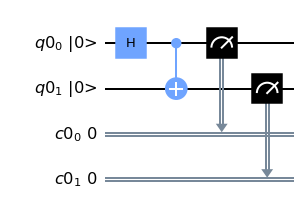

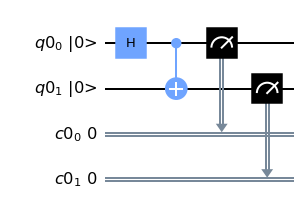

In [18]:
circuit.draw(initial_state=True, 
             cregbundle=False, output = 'mpl') 

In [22]:
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [25]:
simulator = provider.get_backend('ibmq_qasm_simulator')

In [26]:
result = execute(circuit, backend = simulator).result()

In [27]:
from qiskit.tools.visualization import plot_histogram

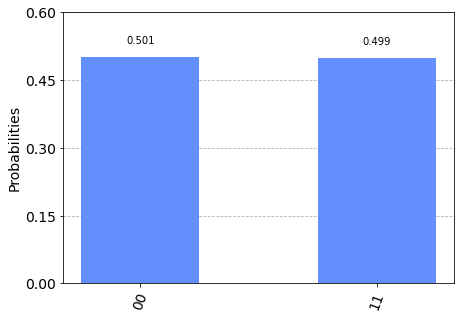

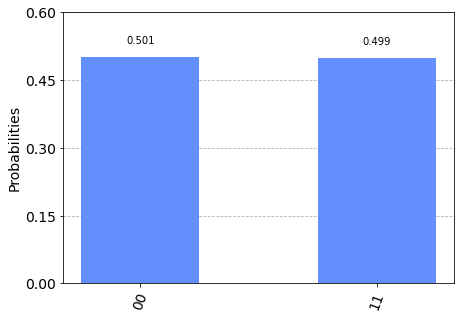

In [28]:
plot_histogram(result.get_counts(circuit))

In [29]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-08-09 21:23:43,691: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [30]:
provider = IBMQ.get_provider('ibm-q')

In [49]:
qcomp = provider.get_backend('ibmq_belem')

In [50]:
job = execute(circuit, backend = qcomp)

In [51]:
from qiskit.tools.monitor import job_monitor

In [52]:
job_monitor(job)

Job Status: job has successfully run


In [53]:
result2 = job.result()

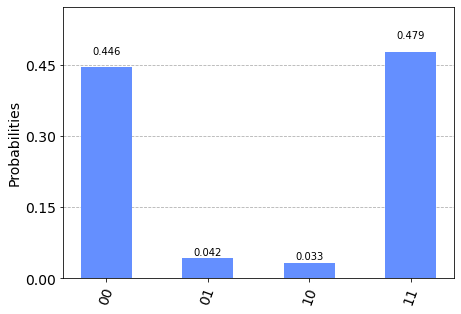

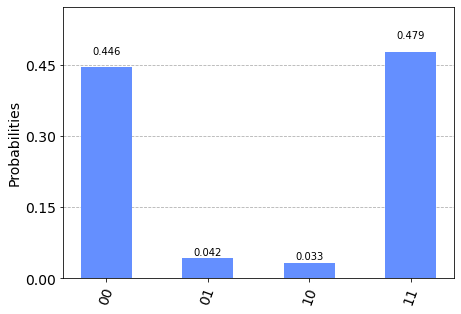

In [54]:
plot_histogram(result2.get_counts(circuit))

# My first circuit

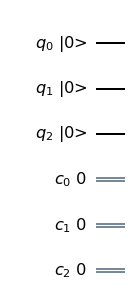

In [8]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.draw(initial_state=True, 
             cregbundle=False, output = 'mpl') 

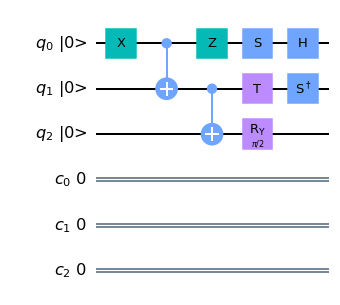

In [9]:
circuit.x(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.z(qreg_q[0])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.s(qreg_q[0])
circuit.t(qreg_q[1])
circuit.ry(pi/2, qreg_q[2])
circuit.h(qreg_q[0])
circuit.sdg(qreg_q[1])

circuit.draw(initial_state=True, 
             cregbundle=False, output = 'mpl') 


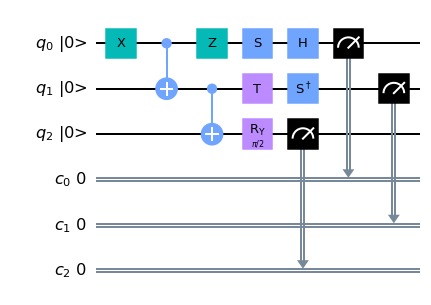

In [10]:
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2]) 


circuit.draw(initial_state=True, 
             cregbundle=False, output = 'mpl') 
